In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv("Predict Students Dropout.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_selection import RFE
    from scipy.stats import chi2_contingency
    import numpy as np

    data.columns = data.columns.str.strip()

    # Encode categorical variables if necessary
    data_encoded = pd.get_dummies(data, drop_first=True)

    # Print column names to verify the presence of target columns
    print(data_encoded.columns)

    # Select target column (choose one based on your analysis)
    target_column = 'Target_Enrolled'  # Change to 'Target_Graduate' if needed

    # Separate features and target, handling possible KeyErrors
    X = data_encoded.drop(columns=[target_column], errors='ignore')  # Drop with error handling
    y = data_encoded[target_column] if target_column in data_encoded.columns else None

    if y is None:
        raise ValueError(f"Target column '{target_column}' not found in the dataset.")

    # Feature Importance using Random Forest
    rf = RandomForestClassifier()
    rf.fit(X, y)
    importances = rf.feature_importances_

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    print(feature_importance_df.sort_values(by='Importance', ascending=False))

    # Recursive Feature Elimination
    rfe = RFE(estimator=rf, n_features_to_select=10)  # Adjust the number as needed
    rfe.fit(X, y)
    selected_features = X.columns[rfe.support_]
    print("Selected Features:", selected_features)

    # Chi-Squared Test for categorical variables
    for col in X.select_dtypes(include=['object']).columns:
        contingency_table = pd.crosstab(data[col], y)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f'{col}: chi2={chi2}, p-value={p}')

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [4]:
print(data_encoded.columns)


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [5]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [8]:
data = pd.read_csv("Predict Students Dropout.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
Sel_Col = ['Course', 'Previous qualification (grade)', 
       'Admission grade', 'Age at enrollment',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Target']
data = data[Sel_Col]

In [10]:
data.head()

,Course,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,171,122.0,127.3,20,0.000000,0,0,0.000000,Dropout
1,9254,160.0,142.5,19,14.000000,6,6,13.666667,Graduate
2,9070,122.0,124.8,19,0.000000,0,0,0.000000,Dropout
3,9773,122.0,119.6,20,13.428571,10,5,12.400000,Graduate
4,8014,100.0,141.5,45,12.333333,6,6,13.000000,Graduate


In [11]:
# Replace 'Enrolled' with 'Graduate' since Enrolled students will soon be graduating
data['Target'] = data['Target'].replace('Graduate', '1')
data['Target'] = data['Target'].replace('Dropout', '0')
data['Target'] = data['Target'].replace('Enrolled','1')

In [12]:
data.head()

,Course,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,171,122.0,127.3,20,0.000000,0,0,0.000000,0
1,9254,160.0,142.5,19,14.000000,6,6,13.666667,1
2,9070,122.0,124.8,19,0.000000,0,0,0.000000,0
3,9773,122.0,119.6,20,13.428571,10,5,12.400000,1
4,8014,100.0,141.5,45,12.333333,6,6,13.000000,1


In [13]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Course': [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Unique values in 'Previous qualification (grade)': [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
Unique values in 'Admission grade': [127.3 142.5 124.8 119.6 141.5 114.8 128.4 113.1 129.3 123.  130.6 119.3
 130.2 111.8 137.1 120.7 137.4 136.3 124.6 120.3 121.8 125.5 114.9 123.9
 157.  116.4 131.  122.1 118.8 150.  130.  

In [14]:
data['Target'].unique()

array(['0', '1'], dtype=object)

In [15]:
# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [16]:
X = data.drop('Target', axis=1)
y = data['Target']

In [17]:
X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (3539, 8)
X_test :  (885, 8)
y_train :  (3539,)
y_test :  (885,)


In [18]:
# Fit and resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

In [19]:
# Create a new DataFrame to see the results
resampled_data = pd.DataFrame(X_resampled)
resampled_data['Target'] = y_resampled

print("Original class distribution:")
print(y.value_counts())

print("\nResampled class distribution:")
print(y_resampled.value_counts())

Original class distribution:
Target
1    3003
0    1421
Name: count, dtype: int64

Resampled class distribution:
Target
0    3003
1    3003
Name: count, dtype: int64


In [20]:
X = resampled_data.drop('Target', axis=1)
y = resampled_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (4804, 8)
X_test :  (1202, 8)
y_train :  (4804,)
y_test :  (1202,)


Best Parameters: {'max_depth': 30, 'n_estimators': 150}
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-score: 0.91


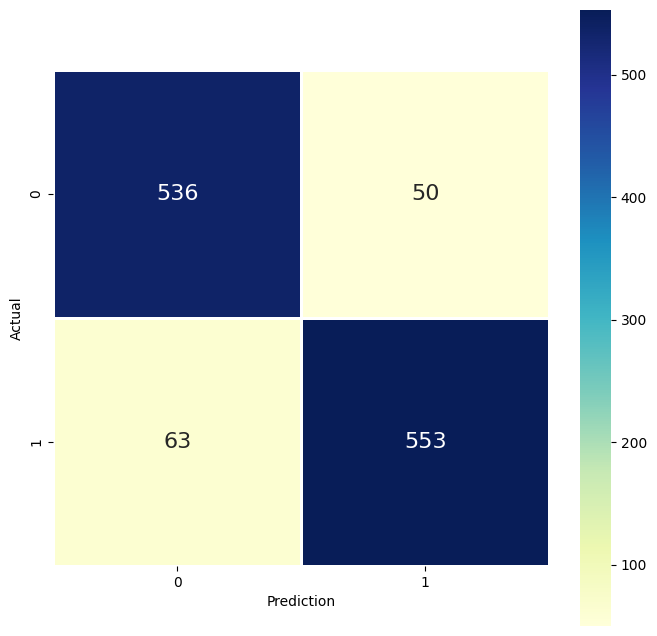

In [22]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

##### Cross validation of how different hyperparameter affects the preformance

In [23]:
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean CV Score: {mean_score:.3f} with params: {params}")


Mean CV Score: 0.817 with params: {'max_depth': 5, 'n_estimators': 50}
Mean CV Score: 0.811 with params: {'max_depth': 5, 'n_estimators': 100}
Mean CV Score: 0.813 with params: {'max_depth': 5, 'n_estimators': 150}
Mean CV Score: 0.813 with params: {'max_depth': 5, 'n_estimators': 200}
Mean CV Score: 0.864 with params: {'max_depth': 10, 'n_estimators': 50}
Mean CV Score: 0.859 with params: {'max_depth': 10, 'n_estimators': 100}
Mean CV Score: 0.863 with params: {'max_depth': 10, 'n_estimators': 150}
Mean CV Score: 0.862 with params: {'max_depth': 10, 'n_estimators': 200}
Mean CV Score: 0.897 with params: {'max_depth': 20, 'n_estimators': 50}
Mean CV Score: 0.893 with params: {'max_depth': 20, 'n_estimators': 100}
Mean CV Score: 0.897 with params: {'max_depth': 20, 'n_estimators': 150}
Mean CV Score: 0.896 with params: {'max_depth': 20, 'n_estimators': 200}
Mean CV Score: 0.895 with params: {'max_depth': 30, 'n_estimators': 50}
Mean CV Score: 0.897 with params: {'max_depth': 30, 'n_esti

C:\Users\Suresh\AppData\Local\Temp\ipykernel_3612\4020712627.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette='viridis')


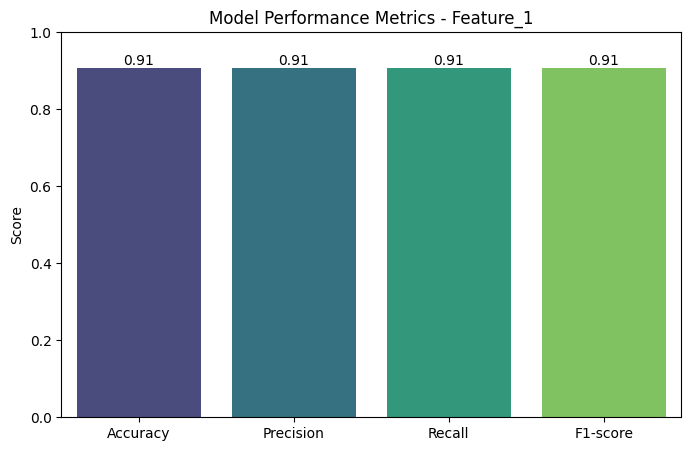

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}


# Create a DataFrame from the metrics
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Set up the figure
plt.figure(figsize=(8, 5))
sns.barplot(x=metric_names, y=metric_values, palette='viridis')

# Add labels and title
plt.ylim(0, 1)  # Set y-axis limits
plt.ylabel('Score')
plt.title('Model Performance Metrics - Feature_1')

# Show the value on top of each bar
for i, value in enumerate(metric_values):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center')

# Show the plot
plt.show()


In [25]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix - Feature_1', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=15)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)

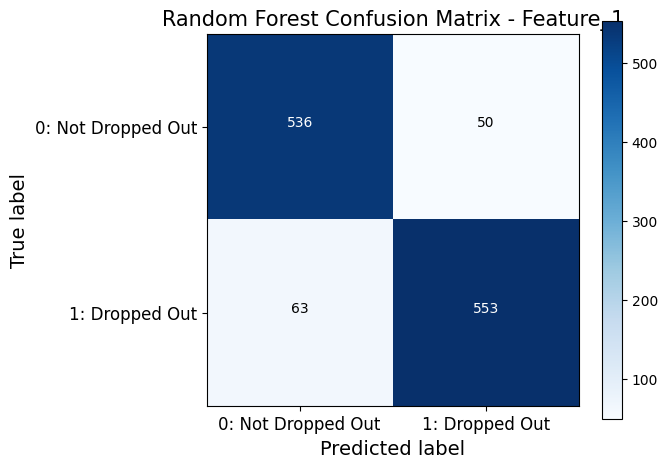

In [26]:
import itertools
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names (adjust according to your specific classes)
class_names = ['0: Not Dropped Out', '1: Dropped Out'] 
plot_confusion_matrix(cm, classes=class_names, title='Random Forest Confusion Matrix - Feature_1')

# Show the plot
plt.show()

In [27]:
# Print classification report
print('Random Forest: Classification Report - Feature_1')
print(classification_report(y_test, y_pred, target_names=['Not Dropped Out', 'Dropped Out']))

# Calculate and print ROC AUC score
rf_probs = best_rf.predict_proba(X_test)
print('ROC - Area Under the Curve: ', round(roc_auc_score(y_test, rf_probs[:, 1]), 2))

Random Forest: Classification Report - Feature_1
                 precision    recall  f1-score   support

Not Dropped Out       0.89      0.91      0.90       586
    Dropped Out       0.92      0.90      0.91       616

       accuracy                           0.91      1202
      macro avg       0.91      0.91      0.91      1202
   weighted avg       0.91      0.91      0.91      1202

ROC - Area Under the Curve:  0.96


Random Forest: Classification Report - Feature_1
                 precision    recall  f1-score   support

Not Dropped Out       0.89      0.91      0.90       586
    Dropped Out       0.92      0.90      0.91       616

       accuracy                           0.91      1202
      macro avg       0.91      0.91      0.91      1202
   weighted avg       0.91      0.91      0.91      1202

ROC - Area Under the Curve:  0.96


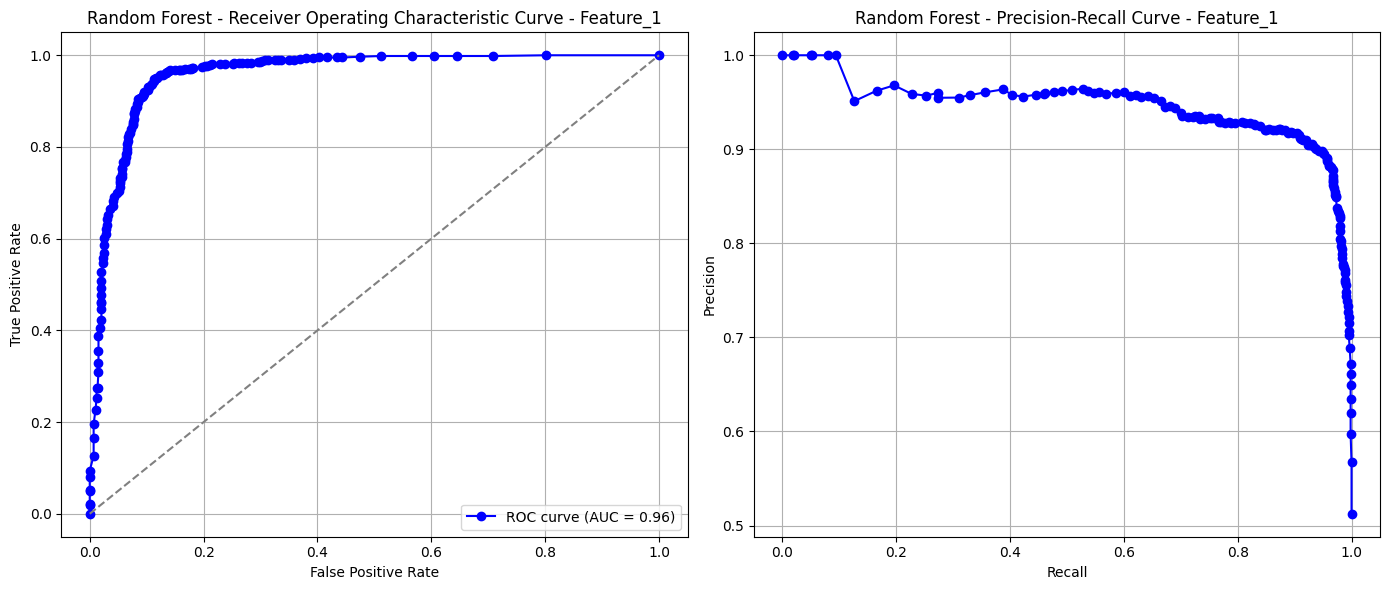

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, precision_recall_curve, roc_auc_score, 
                             classification_report)

# Convert y_test to integers if they are strings
y_test = y_test.astype(int)


# Print classification report
print('Random Forest: Classification Report - Feature_1')
print(classification_report(y_test, np.argmax(rf_probs, axis=1), target_names=['Not Dropped Out', 'Dropped Out']))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, rf_probs[:, 1])
print('ROC - Area Under the Curve: ', round(roc_auc, 2))

# Plot ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_test, rf_probs[:, 1])
plt.figure(figsize=(14, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, marker='o', color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Random Forest - Receiver Operating Characteristic Curve - Feature_1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()

# Calculate precision-recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, rf_probs[:, 1])

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o', color='blue')
plt.title('Random Forest - Precision-Recall Curve - Feature_1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()

plt.tight_layout()
plt.show()


In [29]:
import joblib 
joblib.dump(best_rf, "Random_Forest_Model_With_Feature_1")



['Random_Forest_Model_With_Feature_1']